# Yahoo Finance
Stock Index, eg, ^GSPC
Curreny Exchange rate, e.g, GBPUSD=X
Options,

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 6.7 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 1.9 MB/s eta 0:00:00
  Created wheel for frozendict: filename=frozendict-2.4.0-py3-none-any.whl size=15425 sha256=b7e7b5a938325b6dbd81b9de261edc17182ae0b619af93d91ee0f7bd8863b78f
  Stored in directory: /Users/johnkim/Library/Caches/pip/wheels/31/dd/81/a814e6f8cde8a1bbc1f088fdc273943371f10478b91a605e14
  Created wheel for peewee: filename=peewee-3.17.1-cp311-cp311-macosx_10_9_universal2.whl size=374599 sha256=ea24e717567b58bcc65140e48b34ed85588512aee68a85e6221110e7a2372a9a
  Stored in directory

In [4]:
import yfinance as yf


In [5]:
#single Stock
apple = yf.download('AAPL',
                       start='2000-01-01',
                       end='2023-12-31')


[*********************100%%**********************]  1 of 1 completed


In [6]:
apple.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600


In [7]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [8]:
type(apple)

pandas.core.frame.DataFrame

In [9]:
apple.shape

(6037, 6)

OHLC - What are those numbers?

You can aslo just download the values you need, e.g., 'Adj Close':

In [14]:
data = yf.download(['TSLA', 'GOOG'],
                       start='2011-01-01',
                       end='2022-12-31')['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [15]:
data.head(3)

Ticker,GOOG,TSLA
Date,,
2011-01-03,15.052330,1.774667
2011-01-04,14.996788,1.778000
2011-01-05,15.169890,1.788667


In [16]:
data.tail()

Ticker,GOOG,TSLA
Date,,
2022-12-23,89.809998,123.150002
2022-12-27,87.930000,109.099998
2022-12-28,86.459999,112.709999
2022-12-29,88.949997,121.820000
2022-12-30,88.730003,123.180000


# You can also get other stock data, eg, minute-by-minute, or monthly ...

In [17]:
#Several stocks
tickers =['AAPL','AMZN','GOOGL','META', 'MCD', 'GM', 'TSLA','PFE']

start_date='2000-01-01'
end_date='2023-12-31'

df=yf.download(
        # tickers list or string as well
        tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        #auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%%**********************]  8 of 8 completed


In [18]:
df.head(5)

Ticker            TSLA                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2024-01-02  250.080002  251.250000  244.410004  248.419998  248.419998   
2024-01-03  244.979996  245.679993  236.320007  238.449997  238.449997   
2024-01-04  239.250000  242.699997  237.729996  237.929993  237.929993   
2024-01-05  236.860001  240.119995  234.899994  237.490005  237.490005   
2024-01-08  236.139999  241.250000  235.300003  240.449997  240.449997   

Ticker                       AAPL                                      ...  \
Price          Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2024-01-02  104654200  187.149994  188.440002  183.889999  185.639999  ...   
2024-01-03  121082600  184.220001  185.880005  183.429993  184.250000  ...   
2024-01-04  102629300  182.149994  183.089996  180.880005  181.910004  ...   
2024-01-05   92379400  181.990005  182.759995  180.169998  181.179993  ...   
2024-01-08   85166600  182.089996  185.600006  181.500000  185.559998  ...   

Ticker             MCD                                         PFE             \
Price              Low       Close   Adj Close   Volume       Open       High   
Date                                                                            
2024-01-02  295.049988  297.040009  297.040009  4458400  28.879999  30.280001   
2024-01-03  294.250000  294.390015  294.390015  3114800  30.000000  30.040001   
2024-01-04  290.920013  291.739990  291.739990  4615400  29.790001  29.950001   
2024-01-05  287.200012  288.989990  288.989990  3406900  29.020000  29.490000   
2024-01-08  287.519989  291.899994  291.899994  3097000  29.360001  29.680000   

Ticker                                                 
Price             Low      Close  Adj Close    Volume  
Date                                                   
2024-01-02  28.830000  29.730000  29.289244  57948700  
2024-01-03  29.410000  29.730000  29.289244  43426500  
2024-01-04  29.030001  29.090000  28.658733  45558200  
2024-01-05  28.750000  29.469999  29.033098  33592600  
2024-01-08  29.170000  29.580000  29.141468  32972100  

[5 rows x 48 columns]

In [19]:
df.dropna().head()

Ticker            TSLA                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2024-01-02  250.080002  251.250000  244.410004  248.419998  248.419998   
2024-01-03  244.979996  245.679993  236.320007  238.449997  238.449997   
2024-01-04  239.250000  242.699997  237.729996  237.929993  237.929993   
2024-01-05  236.860001  240.119995  234.899994  237.490005  237.490005   
2024-01-08  236.139999  241.250000  235.300003  240.449997  240.449997   

Ticker                       AAPL                                      ...  \
Price          Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2024-01-02  104654200  187.149994  188.440002  183.889999  185.639999  ...   
2024-01-03  121082600  184.220001  185.880005  183.429993  184.250000  ...   
2024-01-04  102629300  182.149994  183.089996  180.880005  181.910004  ...   
2024-01-05   92379400  181.990005  182.759995  180.169998  181.179993  ...   
2024-01-08   85166600  182.089996  185.600006  181.500000  185.559998  ...   

Ticker             MCD                                         PFE             \
Price              Low       Close   Adj Close   Volume       Open       High   
Date                                                                            
2024-01-02  295.049988  297.040009  297.040009  4458400  28.879999  30.280001   
2024-01-03  294.250000  294.390015  294.390015  3114800  30.000000  30.040001   
2024-01-04  290.920013  291.739990  291.739990  4615400  29.790001  29.950001   
2024-01-05  287.200012  288.989990  288.989990  3406900  29.020000  29.490000   
2024-01-08  287.519989  291.899994  291.899994  3097000  29.360001  29.680000   

Ticker                                                 
Price             Low      Close  Adj Close    Volume  
Date                                                   
2024-01-02  28.830000  29.730000  29.289244  57948700  
2024-01-03  29.410000  29.730000  29.289244  43426500  
2024-01-04  29.030001  29.090000  28.658733  45558200  
2024-01-05  28.750000  29.469999  29.033098  33592600  
2024-01-08  29.170000  29.580000  29.141468  32972100  

[5 rows x 48 columns]

<Axes: xlabel='Date'>

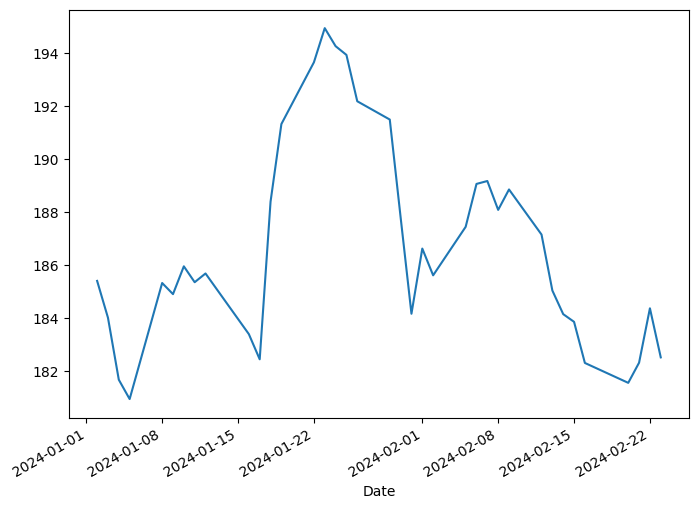

In [20]:
df['AAPL']['Adj Close'].plot(figsize=(8,6))

# You can also get company info

In [21]:

tsla=yf.Ticker('TSLA')

In [22]:
tsla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [23]:
tsla.info['companyOfficers']

[{'maxAge': 1,
  'name': 'Mr. Elon R. Musk',
  'age': 51,
  'title': 'Technoking of Tesla, CEO & Director',
  'yearBorn': 1972,
  'fiscalYear': 2022,
  'exercisedValue': 0,
  'unexercisedValue': 27819718656},
 {'maxAge': 1,
  'name': 'Mr. Andrew D. Baglino',
  'age': 42,
  'title': 'Senior Vice President of Powertrain & Energy Engineering',
  'yearBorn': 1981,
  'fiscalYear': 2022,
  'totalPay': 303000,
  'exercisedValue': 33866368,
  'unexercisedValue': 57355632},
 {'maxAge': 1,
  'name': 'Mr. Vaibhav  Taneja',
  'age': 45,
  'title': 'CFO, Corporate Controller & Chief Accounting Officer',
  'yearBorn': 1978,
  'fiscalYear': 2022,
  'exercisedValue': 0,
  'unexercisedValue': 0},
 {'maxAge': 1,
  'name': 'Mr. Martin  Viecha',
  'title': 'Senior Director for Investor Relations',
  'fiscalYear': 2022,
  'exercisedValue': 0,
  'unexercisedValue': 0},
 {'maxAge': 1,
  'name': 'Brian  Scelfo',
  'title': 'Senior Director of Corporate Development',
  'fiscalYear': 2022,
  'exercisedValue': 0

In [24]:
tsla.info['forwardPE']

49.604652

In [25]:
tsla.info['trailingPE']

44.644184

In [26]:
tsla.history(period="max").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3437 entries, 2010-06-29 00:00:00-04:00 to 2024-02-23 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3437 non-null   float64
 1   High          3437 non-null   float64
 2   Low           3437 non-null   float64
 3   Close         3437 non-null   float64
 4   Volume        3437 non-null   int64  
 5   Dividends     3437 non-null   float64
 6   Stock Splits  3437 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 214.8 KB


# List the dividend payments and stock splits:  corporate action

In [27]:
tsla.actions

,Dividends,Stock Splits
Date,,
2020-08-31 00:00:00-04:00,0.0,5.0
2022-08-25 00:00:00-04:00,0.0,3.0


In [28]:
tsla.dividends

Series([], Name: Dividends, dtype: float64)

In [29]:
tsla.splits

Date
2020-08-31 00:00:00-04:00    5.0
2022-08-25 00:00:00-04:00    3.0
Name: Stock Splits, dtype: float64

# Download Futures Price

[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

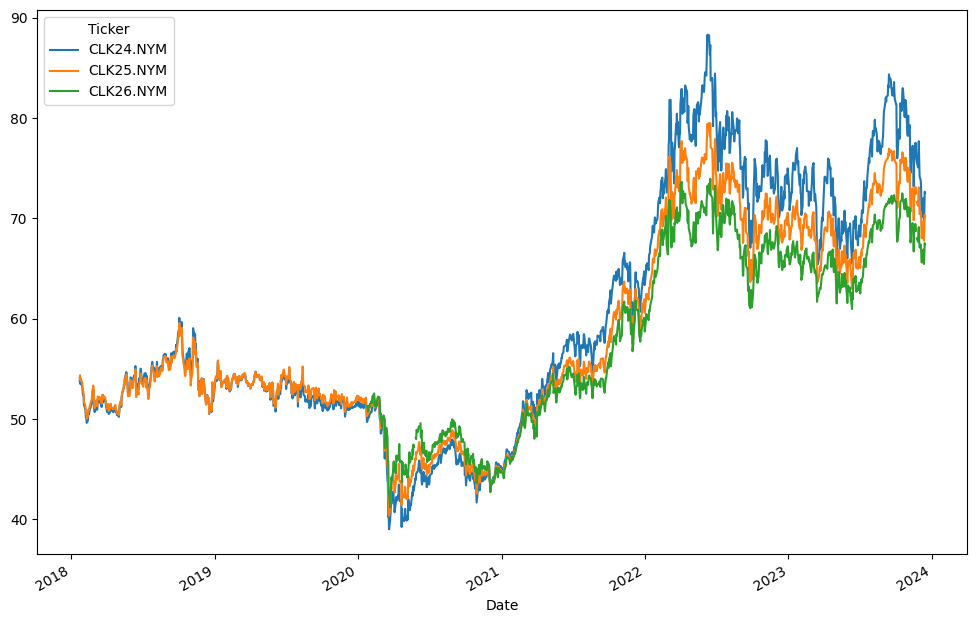

In [30]:
data = yf.download("CLK24.NYM, CLK25.NYM, CLK26.NYM", start="2018-01-01", end="2023-12-18")
data['Close'].plot(figsize=(12,8))


[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

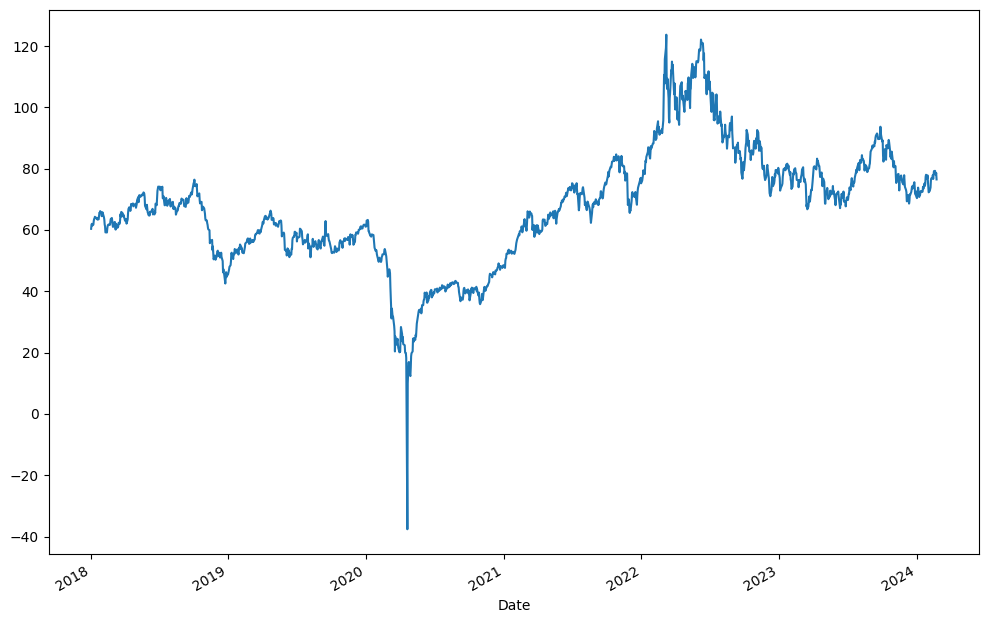

In [31]:
#Front Month Crude Oil Futures
data = yf.download("CL=F", start="2018-01-01")
data['Close'].plot(figsize=(12,8))

# Download options data using the yfinance
## First, let us look at what maturity dates are traded

In [32]:
#Look at SP500 options
spx=yf.Ticker('^SPX')
spx.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5087.03,
 'open': 5100.92,
 'dayLow': 5081.46,
 'dayHigh': 5111.06,
 'regularMarketPreviousClose': 5087.03,
 'regularMarketOpen': 5100.92,
 'regularMarketDayLow': 5081.46,
 'regularMarketDayHigh': 5111.06,
 'volume': 2257141184,
 'regularMarketVolume': 2257141184,
 'averageVolume': 4024996393,
 'averageVolume10days': 3938553000,
 'averageDailyVolume10Day': 3938553000,
 'bid': 5034.25,
 'ask': 5139.04,
 'fiftyTwoWeekLow': 3808.86,
 'fiftyTwoWeekHigh': 5111.06,
 'fiftyDayAverage': 4848.5503,
 'twoHundredDayAverage': 4503.6323,
 'currency': 'USD',
 'exchange': 'WCB',
 'quoteType': 'INDEX',
 'symbol': '^SPX',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500 INDEX',
 'longName': 'S&P 500 INDEX',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': '598377dc-b757-301a-9621-bbef63eca4d0',
 'messageBoardId': 'finmb_INDEXSPX',
 'gmtOffSetMilliseconds': -18000000,
 'trailing

In [ ]:
spx.options

('2024-02-06',
 '2024-02-07',
 '2024-02-08',
 '2024-02-09',
 '2024-02-12',
 '2024-02-13',
 '2024-02-14',
 '2024-02-15',
 '2024-02-16',
 '2024-02-20',
 '2024-02-21',
 '2024-02-22',
 '2024-02-23',
 '2024-02-26',
 '2024-02-27',
 '2024-02-28',
 '2024-02-29',
 '2024-03-01',
 '2024-03-04',
 '2024-03-05',
 '2024-03-06',
 '2024-03-07',
 '2024-03-08',
 '2024-03-11',
 '2024-03-12',
 '2024-03-15',
 '2024-03-18',
 '2024-03-22',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-07-31',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
#Options expiring on a particular date - OPtion Chain
opt_chain = spx.option_chain(date='2024-08-16')
opt_chain

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice      bid  \
0    SPX240816C00200000 2023-09-22 16:48:38+00:00   200.0    4110.20  3926.60   
1    SPX240816C00400000 2023-07-31 14:51:10+00:00   400.0    4156.30     0.00   
2    SPX240816C00600000 2023-07-24 13:42:02+00:00   600.0    3931.80     0.00   
3    SPX240816C01000000 2024-01-02 19:25:24+00:00  1000.0    3733.76  3892.40   
4    SPX240816C01200000 2023-07-24 13:42:56+00:00  1200.0    3369.30     0.00   
..                  ...                       ...     ...        ...      ...   
103  SPX240816C07000000 2023-12-28 19:44:40+00:00  7000.0       0.17     0.00   
104  SPX240816C07200000 2023-11-27 16:21:28+00:00  7200.0       0.17     0.05   
105  SPX240816C07400000 2023-08-30 19:14:58+00:00  7400.0       0.17     0.00   
106  SPX240816C07600000 2023-10-24 13:53:07+00:00  7600.0       0.12     0.05   
107  SPX240816C07800000 2024-01-29 14:30:14+00:00  7800.0       0.15     0.00   

         ask 

In [ ]:
opt_chain.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPX240816C00200000,2023-09-22 16:48:38+00:00,200.0,4110.20,3926.60,4530.20,0.0,0.0,4.0,17,0.000010,True,REGULAR,USD
1,SPX240816C00400000,2023-07-31 14:51:10+00:00,400.0,4156.30,0.00,0.00,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD
2,SPX240816C00600000,2023-07-24 13:42:02+00:00,600.0,3931.80,0.00,0.00,0.0,0.0,NaN,0,0.000010,True,REGULAR,USD
3,SPX240816C01000000,2024-01-02 19:25:24+00:00,1000.0,3733.76,3892.40,3909.00,0.0,0.0,1.0,13,0.000010,True,REGULAR,USD
4,SPX240816C01200000,2023-07-24 13:42:56+00:00,1200.0,3369.30,0.00,0.00,0.0,0.0,NaN,0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,SPX240816C07000000,2023-12-28 19:44:40+00:00,7000.0,0.17,0.00,0.25,0.0,0.0,53.0,302,0.158456,False,REGULAR,USD
104,SPX240816C07200000,2023-11-27 16:21:28+00:00,7200.0,0.17,0.05,0.25,0.0,0.0,2.0,4,0.170052,False,REGULAR,USD
105,SPX240816C07400000,2023-08-30 19:14:58+00:00,7400.0,0.17,0.00,0.50,0.0,0.0,NaN,1,0.192574,False,REGULAR,USD
106,SPX240816C07600000,2023-10-24 13:53:07+00:00,7600.0,0.12,0.05,0.25,0.0,0.0,2.0,0,0.191903,False,REGULAR,USD


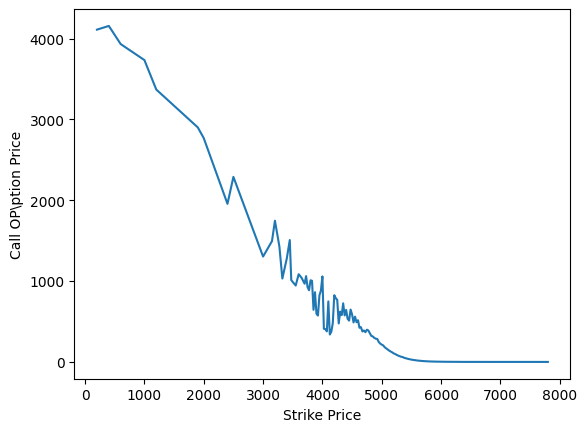

In [ ]:
plt.plot(opt_chain.calls.strike, opt_chain.calls.lastPrice)
plt.xlabel('Strike Price')
plt.ylabel('Call OP\ption Price')
plt.show()

In [ ]:
opt_chain.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPX240816P00200000,2023-11-16 21:04:55+00:00,200.0,0.05,0.0,0.25,0.0,0.0,300.0,355,1.349613,False,REGULAR,USD
1,SPX240816P00400000,2023-12-20 16:47:20+00:00,400.0,0.05,0.0,0.20,0.0,0.0,20.0,3588,1.029302,False,REGULAR,USD
2,SPX240816P00600000,2024-02-05 14:45:25+00:00,600.0,0.05,0.0,0.10,0.0,0.0,250.0,2897,0.820314,False,REGULAR,USD
3,SPX240816P00800000,2024-02-06 15:12:53+00:00,800.0,0.15,0.1,0.20,0.0,0.0,1.0,1092,0.765627,False,REGULAR,USD
4,SPX240816P01000000,2024-01-31 16:21:20+00:00,1000.0,0.35,0.2,0.35,0.0,0.0,1200.0,11846,0.704593,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,SPX240816P06400000,2024-01-24 18:04:02+00:00,6400.0,1345.77,1298.6,1313.40,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD
124,SPX240816P06600000,2023-10-19 16:03:36+00:00,6600.0,2015.38,1857.2,1881.10,0.0,0.0,2.0,16,0.481906,True,REGULAR,USD
125,SPX240816P07400000,2023-10-20 16:01:07+00:00,7400.0,2870.18,2624.8,2648.70,0.0,0.0,1.0,1,0.538710,True,REGULAR,USD
126,SPX240816P07600000,2023-12-13 19:02:59+00:00,7600.0,2694.30,2611.6,2646.10,0.0,0.0,NaN,22,0.000010,True,REGULAR,USD


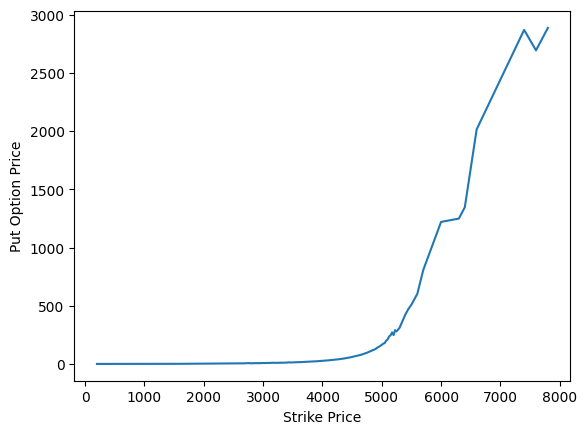

In [ ]:
plt.plot(opt_chain.puts.strike, opt_chain.puts.lastPrice)
plt.xlabel('Strike Price')
plt.ylabel('Put Option Price')
plt.show()

# Quandl
First, let's start by importing some libraries.
"Quandl" allows us to get data from NASDAQ
You need to get an API key on Quandl's website. Sign-up and getting an API key is free but has some limits. As a logged-in free user, you will be able to call 2,000 calls per 10 minutes maximum (speed limit), and 50,000 calls per day (volume limit). https://www.quandl.com/  (which will lead you to https://data.nasdaq.com/)

The stocks selected for this example are Apple, Amazon, Google, Facebook, MacDonald, General MOtor, Tesla, and Pfizer, . Below code block will get daily adjusted closing price of each stock

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import importlib.util
package = 'quandl'
spec = importlib.util.find_spec(package)
if spec is None:
    print(package+" is not installed")
    !pip install --upgrade quandl



quandl is not installed


In [ ]:
import quandl

quandl.ApiConfig.api_key = 'PNzc8CxVBCyfmzjfFqaz'
stocks = ['AAPL','AMZN','GOOGL','FB', 'MCD', 'GM', 'TSLA','PFE']
df_quandl = quandl.get_table('WIKI/PRICES', ticker = stocks,
                   date = { 'gte': '2016-1-1', 'lte': '2021-12-31' }, paginate=True)
df_quandl.head(5)

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,TSLA,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,TSLA,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,TSLA,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,TSLA,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,TSLA,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [ ]:
df = df_quandl.set_index('date')
table = df.pivot(columns='ticker')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head(5)

,AAPL,AMZN,FB,GM,GOOGL,MCD,PFE,TSLA,AAPL,AMZN,...,PFE,TSLA,AAPL,AMZN,FB,GM,GOOGL,MCD,PFE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,102.61,656.29,101.95,33.45,762.20,117.25,31.85,230.72,105.368,657.715,...,29.614720,223.41,67649387.0,9314519.0,37912403.0,14875381.0,3369068.0,9995004.0,37306299.0,6827146.0
2016-01-05,105.75,646.86,102.89,33.33,764.10,117.41,32.18,226.36,105.850,646.910,...,29.827908,223.43,55790992.0,5822603.0,23258238.0,19755908.0,2260795.0,6312701.0,27302655.0,3186752.0
2016-01-06,100.56,622.00,101.13,31.95,750.37,118.00,31.73,220.00,102.370,639.790,...,29.299571,219.04,68457388.0,5329197.0,25096183.0,27514380.0,2410301.0,6543740.0,25845908.0,3779128.0
2016-01-07,98.68,621.80,100.50,30.26,746.49,117.44,31.16,214.19,100.130,630.000,...,29.104920,215.65,81094428.0,7074915.0,45172906.0,21030692.0,3156563.0,7472323.0,37205401.0,3554251.0
2016-01-08,98.55,619.66,99.88,30.46,747.80,115.75,31.55,217.86,99.110,624.140,...,28.734157,211.00,70798016.0,5512915.0,35402298.0,16447761.0,2375348.0,6103181.0,33053066.0,3628058.0


In [ ]:
quandl.ApiConfig.api_key = 'PNzc8CxVBCyfmzjfFqaz'
stocks = ['AAPL','AMZN','GOOGL','FB', 'MCD', 'GM', 'TSLA','PFE']
df_quandl = quandl.get_table('WIKI/PRICES', ticker = stocks,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2021-12-31' }, paginate=True)
df_quandl.head()

,date,ticker,adj_close
None,,,
0,2018-03-27,TSLA,279.18
1,2018-03-26,TSLA,304.18
2,2018-03-23,TSLA,301.54
3,2018-03-22,TSLA,309.10
4,2018-03-21,TSLA,316.53


<Axes: xlabel='Date'>

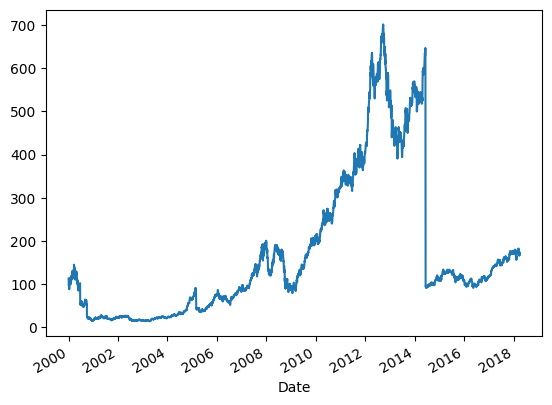

In [ ]:

df_aapl = quandl.get(dataset='WIKI/AAPL',
                       start_date='2000-01-01',
                       end_date='2022-12-31')
df_aapl.Close.plot()

# For the Data available at, see https://data.nasdaq.com/


# Example: US GDP Data

In [ ]:
gdp=quandl.get('FRED/GDP')
               #start_date='1970-01-01',end_date='2021-12-31')

<Axes: xlabel='Date'>

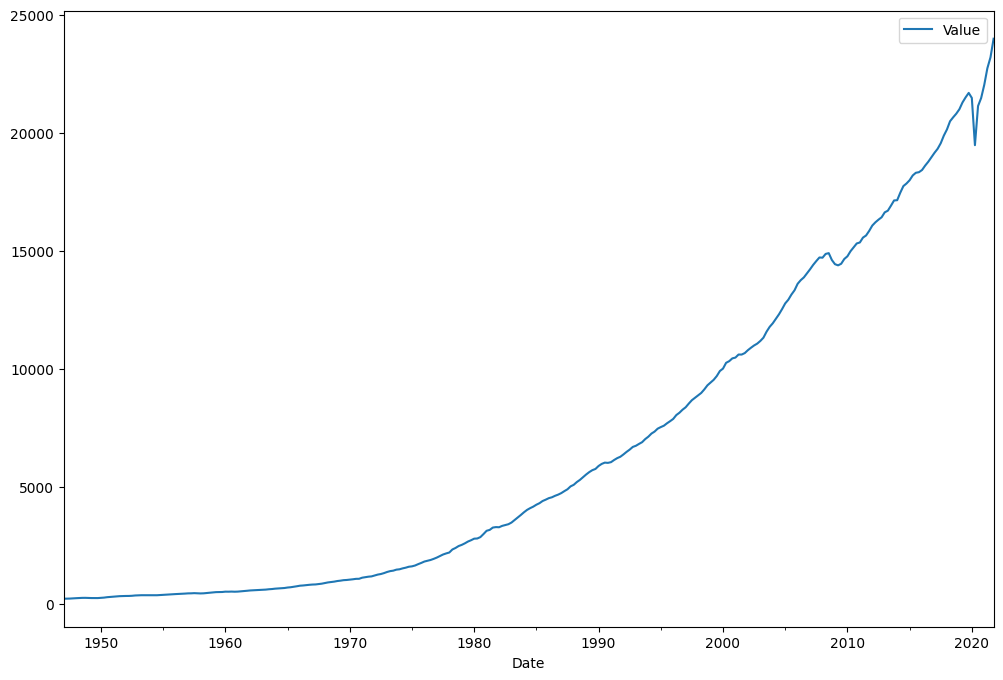

In [ ]:
gdp.plot(figsize=(12, 8))

# You can also download option data. Here is the volatility data

# Let us compare US GDP with SP 500DP

In [ ]:
spx=yf.download('^GSPC', start='1970-01-01',end='2022-12-31', interval='3mo' )
gdp=quandl.get('FRED/GDP',start_date='1970-01-01',end_date='2022-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
spx.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-01,167.199997,183.949997,163.360001,180.660004,180.660004,7021420000
1985-04-01,180.660004,191.850006,177.860001,191.850006,191.850006,6449220000
1985-07-01,191.850006,196.070007,179.449997,182.080002,182.080002,6246430000
1985-10-01,182.059998,213.080002,181.160004,211.279999,211.279999,7792990000
1986-01-01,211.279999,240.110001,202.600006,238.899994,238.899994,8992710000


In [ ]:
gdp.head(5)

,Value
Date,
1970-01-01,1051.200
1970-04-01,1067.375
1970-07-01,1086.059
1970-10-01,1088.608
1971-01-01,1135.156


In [ ]:
data=spx.join(gdp).dropna()

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Value
Date,,,,,,,
1985-01-01,167.199997,183.949997,163.360001,180.660004,180.660004,7021420000,4230.168
1985-04-01,180.660004,191.850006,177.860001,191.850006,191.850006,6449220000,4294.887
1985-07-01,191.850006,196.070007,179.449997,182.080002,182.080002,6246430000,4386.773
1985-10-01,182.059998,213.080002,181.160004,211.279999,211.279999,7792990000,4444.094
1986-01-01,211.279999,240.110001,202.600006,238.899994,238.899994,8992710000,4507.894
...,...,...,...,...,...,...,...
2020-10-01,3385.870117,3760.199951,3233.939941,3756.070068,3756.070068,287561840000,21477.597
2021-01-01,3764.610107,3994.409912,3662.709961,3972.889893,3972.889893,327571270000,22038.226
2021-04-01,3992.780029,4302.430176,3992.780029,4297.500000,4297.500000,273990130000,22740.959


In [ ]:
data.drop(columns=['Open','High','Low','Close','Volume'], inplace=True)

In [ ]:
data

,Adj Close,Value
Date,,
1985-01-01,180.660004,4230.168
1985-04-01,191.850006,4294.887
1985-07-01,182.080002,4386.773
1985-10-01,211.279999,4444.094
1986-01-01,238.899994,4507.894
...,...,...
2020-10-01,3756.070068,21477.597
2021-01-01,3972.889893,22038.226
2021-04-01,4297.500000,22740.959


For a times series $S_1, S_2, \cdots, S_T$, we write the single period return as
$r_t=\ln\frac{S_t}{S_{t-1}}$. The total return over the time period will be
$r_1+r_2+\cdots+r_T$  

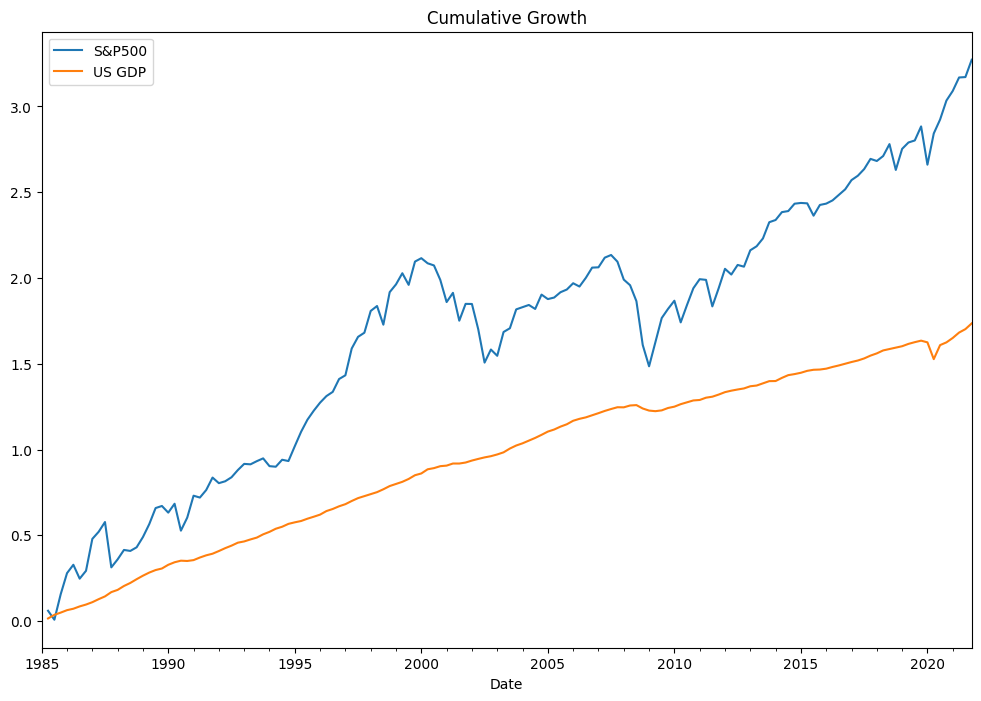

In [ ]:
data.rename(columns={'Adj Close':'S&P500', 'Value':'US GDP'}, inplace=True)
growth=np.log(data/data.shift(1)).cumsum().plot(figsize=(12,8))
plt.title('Cumulative Growth')
plt.savefig('SP500+gdp.jpg')
plt.show()

## Group Assignment Question 1
From the above graph, we can see S&P 500 index growths much faster than GDP. Can you state this observation in economical term?  What might be the possible explanation?

# Other sources
For Example:  CRSP using the WRDS service (not free)

#  Stock Indices

 ## Dow-Jones Industrial Average

In [ ]:
import pandas as pd

# There are 2 tables on the Wikipedia page,  we want the second table
#First table: description

components = \
pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Components')

first_table = components[0]
second_table = components[1]
df = second_table
df

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
5,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,NaN,4.52%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.50%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.96%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.22%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,1.89%


# Market Cap

In [ ]:

record=[]
#record=['Comapny', 'ticker', 'MarketCap']
for symbol in df['Symbol']:
    sys=symbol.replace('.', '-')  #BRk.B --> BRK-B
    info = yf.Ticker(sys).info
    marketcap = info['marketCap']
    record.append([symbol, marketcap])
    print(symbol, 'Market Cap: ', marketcap)

MMM Market Cap:  51713290240
AXP Market Cap:  147817349120
AMGN Market Cap:  169402564608
AAPL Market Cap:  2910180605952
BA Market Cap:  127919185920
CAT Market Cap:  163614834688
CVX Market Cap:  283684274176
CSCO Market Cap:  203407654912
KO Market Cap:  259037102080
DIS Market Cap:  181725085696
DOW Market Cap:  37937868800
GS Market Cap:  125080256512
HD Market Cap:  352870137856
HON Market Cap:  127583199232
IBM Market Cap:  167678410752
INTC Market Cap:  179182223360
JNJ Market Cap:  380422488064
JPM Market Cap:  501020426240
MCD Market Cap:  204413124608
MRK Market Cap:  321225064448
MSFT Market Cap:  2996101447680
NKE Market Cap:  154800570368
PG Market Cap:  373812527104
CRM Market Cap:  275105611776
TRV Market Cap:  48510775296
UNH Market Cap:  471221534720
VZ Market Cap:  172914638848
V Market Cap:  566461136896
WBA Market Cap:  19800152064
WMT Market Cap:  456925249536


In [ ]:
df[['Company', 'Symbol']]

,Company,Symbol
0,3M,MMM
1,American Express,AXP
2,Amgen,AMGN
3,Apple,AAPL
4,Boeing,BA
5,Caterpillar,CAT
6,Chevron,CVX
7,Cisco,CSCO
8,Coca-Cola,KO
9,Disney,DIS


# Last Close price

In [ ]:
import yfinance as yf

for symbol in df['Symbol']:
    ticker_yahoo = yf.Ticker(symbol)
    data = ticker_yahoo.history(period='1d')
    last_quote = (data.tail(1)['Close'].iloc[0])
    print(symbol,round(last_quote,2))


MMM 93.56
AXP 204.35
AMGN 316.41
AAPL 188.45
BA 209.45
CAT 321.34
CVX 153.22
CSCO 50.04
KO 59.9
DIS 99.09
DOW 54.01
GS 383.4
HD 354.46
HON 193.46
IBM 183.61
INTC 42.35
JNJ 158.1
JPM 174.14
MCD 282.95
MRK 126.78
MSFT 403.17
NKE 102.14
PG 158.87
CRM 284.23
TRV 212.58
UNH 509.53
VZ 41.11
V 275.77
WBA 22.93
WMT 169.69


## S&P 500 Stocks Composite Index

In [ ]:
import pandas as pd

# There are 2 tables on the Wikipedia page, we want the first table
# second table shows the evolution of the changes

components = \
pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')

first_table = components[0]
second_table = components[1]
sp_df = first_table
sp_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
sp_df[200:250]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
200,FLT,Fleetcor,Financials,Transaction & Payment Processing Services,"Atlanta, Georgia",2018-06-20,1175454,2000
201,FMC,FMC Corporation,Materials,Fertilizers & Agricultural Chemicals,"Philadelphia, Pennsylvania",2009-08-19,37785,1883
202,F,Ford Motor Company,Consumer Discretionary,Automobile Manufacturers,"Dearborn, Michigan",1957-03-04,37996,1903
203,FTNT,Fortinet,Information Technology,Systems Software,"Sunnyvale, California",2018-10-11,1262039,2000
204,FTV,Fortive,Industrials,Industrial Machinery & Supplies & Components,"Everett, Washington",2016-07-01,1659166,2016
205,FOXA,Fox Corporation (Class A),Communication Services,Broadcasting,"New York City, New York",2019-03-04,1754301,2019
206,FOX,Fox Corporation (Class B),Communication Services,Broadcasting,"New York City, New York",2019-03-04,1754301,2019
207,BEN,Franklin Templeton,Financials,Asset Management & Custody Banks,"San Mateo, California",1998-04-30,38777,1947
208,FCX,Freeport-McMoRan,Materials,Copper,"Phoenix, Arizona",2011-07-01,831259,1912
209,GRMN,Garmin,Consumer Discretionary,Consumer Electronics,"Schaffhausen, Switzerland",2012-12-12,1121788,1989


In [ ]:
yf.Ticker('HAL').history(period='1d')['Close']

Date
2024-02-06 00:00:00-05:00    34.814999
Name: Close, dtype: float64

# Last Closing Price

In [ ]:

import warnings
warnings.filterwarnings("ignore")

## For some reason INFO has no data

SP500_Current_Price=[]

for symbol in sp_df['Symbol']:
    try:
    #if symbol != 'INFO':
        sym=symbol.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(sym)
        data = ticker_yahoo.history(period='1d')
        last_quote = (data.tail(1)['Close'].iloc[0])
        SP500_Current_Price.append(
            {
                #     'Company':sym['Security'],
                "Ticker":sym,
                "Last Closing":last_quote
            }
        )
    except:
        pass

SP500_Current_Price=pd.DataFrame(SP500_Current_Price)

    #print(symbol,round(last_quote,2))

In [ ]:
SP500_Current_Price

,Ticker,Last Closing
0,MMM,93.510002
1,AOS,77.870003
2,ABT,114.349998
3,ABBV,172.729996
4,ACN,365.059998
...,...,...
498,YUM,127.415001
499,ZBRA,241.979996
500,ZBH,127.385002
501,ZION,39.000000


# List of PE

In [ ]:
yf.Ticker('IBM').info

{'address1': 'One New Orchard Road',
 'city': 'Armonk',
 'state': 'NY',
 'zip': '10504',
 'country': 'United States',
 'phone': '914 499 1900',
 'website': 'https://www.ibm.com',
 'industry': 'Information Technology Services',
 'industryKey': 'information-technology-services',
 'industryDisp': 'Information Technology Services',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "International Business Machines Corporation, together with its subsidiaries, provides integrated solutions and services worldwide. The company operates through four business segments: Software, Consulting, Infrastructure, and Financing. The Software segment offers hybrid cloud platform and software solutions; software for business automation, AIOps and management, integration, and application servers; data and artificial intelligence solutions; and security software and services for threat, data, and identity. This segment also provides transaction processi

In [ ]:
yf.Ticker('IBM').info['trailingPE']


22.54791

In [ ]:
!dir

sample_data  SP500+gdp.jpg


In [ ]:
##Warning:  This takes a LONG time to run

SP500_PE=[]


for symbol in sp_df['Symbol']:
    try:
    #if symbol not in ['INFO', 'AES']:
        sym=symbol.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(sym)
        print(symbol,round(ticker_yahoo.info['forwardPE'],2))
        SP500_PE.append(
            {
                "Ticker":sym,
                "trainlingPE":ticker_yahoo.info['trailingPE'],
                "forwardPE": ticker_yahoo.info['forwardPE']
            }
        )
    except:
        pass

SP500_PE=pd.DataFrame(SP500_PE)

    #    print(symbol,round(ticker_yahoo.info['forwardPE'],2))

MMM 9.16
AOS 17.94
ABT 22.36
ABBV 14.14
ACN 26.94
ADBE 29.86
AMD 30.49
AES 8.68
AFL 11.14
A 22.39
APD 15.56
ABNB 32.19
AKAM 18.44
ALB 13.34
ARE 37.87
ALGN 27.6
ALLE 17.88
LNT 15.6
ALL 13.02
GOOGL 18.37
GOOG 18.66
MO 7.7
AMZN 30.97
AMCR 12.72
AEE 15.03
AAL 4.54
AEP 13.81
AXP 13.88
AIG 9.29
AMT 39.29
AWK 23.69
AMP 10.44
AME 24.12
AMGN 15.83
APH 27.89
ADI 21.7
ANSS 34.91
AON 16.93
APA 6.35
AAPL 26.32
AMAT 18.65
APTV 11.79
ACGL 10.65
ADM 9.19
ANET 36.13
AJG 20.61
AIZ 11.73
T 7.65
ATO 15.7
ADSK 31.15
ADP 24.98
AZO 17.11
AVB 30.66
AVY 18.75
AXON 62.74
BKR 11.82
BALL 16.79
BAC 9.61
BK 9.36
BBWI 12.93
BAX 13.49
BDX 16.59
BRK.B 21.71
BBY 12.16
BIO 28.04
TECH 33.03
BIIB 15.64
BLK 17.14
BX 19.9
BA 26.22
BKNG 20.57
BWA 7.98
BXP 34.97
BSX 25.33
BMY 6.81
AVGO 21.76
BR 23.21
BRO 21.09
BF.B 26.84
BLDR 14.49
BG 8.55
CDNS 49.5
CZR 30.97
CPT 52.44
CPB 13.77
COF 8.14
CAH 13.05
KMX 20.69
CCL 11.79
CARR 19.3
CTLT 36.3
CAT 14.8
CBOE 20.28
CBRE 19.33
CDW 21.88
CE 12.53
COR 16.16
CNC 11.11
CNP 17.07
CF 11.86
C

In [ ]:
SP500_PE.to_csv('sp500company_pe_2022.csv')

In [ ]:
!dir

sample_data  sp500company_pe_2022.csv  SP500+gdp.jpg
